In [2]:
import numpy as np
import pygrib
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd
from scipy.constants import convert_temperature
import pytz
from datetime import datetime
from metpy import calc
from metpy.units import units
import matplotlib as mpl
from meteocalc import dew_point
# mpl.rc("savefig", dpi=300)

In [3]:
df1 = pd.read_csv('./observation/CRNH0203-2007-2018-MI_Gaylord_9_SSW_crc.csv')
df1 = df1.drop(df1.index[-1])
df1

,YEAR,MONTH,DAY,HOUR,atmp,relh,srad,pcpn,dew
0,2007,9,19,18,NaN,NaN,47,NaN,NaN
1,2007,9,19,19,64.40,NaN,1,0.000000,NaN
2,2007,9,19,20,60.44,NaN,0,0.000000,NaN
3,2007,9,19,21,58.64,NaN,0,0.000000,NaN
4,2007,9,19,22,58.28,NaN,0,0.000000,NaN
...,...,...,...,...,...,...,...,...,...
98900,2018,12,31,14,28.40,85.0,26,0.027559,24.475821
98901,2018,12,31,15,28.58,90.0,18,0.043307,26.025909
98902,2018,12,31,16,28.58,94.0,5,0.051181,27.076460
98903,2018,12,31,17,28.40,95.0,0,0.051181,27.153889


In [4]:
df2 = pd.read_csv('./extracted/Gaylord/Gaylord_9km.csv')
df2 = df2.drop(df2.index[:-98905])
df2

,YEAR,MONTH,DAY,HOUR,atmp,pcpn,relh,srad,wspd,dew
58865,2007,9,19,19,69.397285,0.000000,69.205866,11.921750,6.891531,58.880293
58866,2007,9,19,20,67.291865,0.000000,73.758318,1.490583,5.022951,58.638154
58867,2007,9,19,21,65.600410,0.000000,78.311967,0.000000,4.015281,58.674189
58868,2007,9,19,22,64.185811,0.000000,82.402820,0.000000,3.543740,58.718135
58869,2007,9,19,23,62.944795,0.000000,85.828635,0.000000,3.555313,58.639912
...,...,...,...,...,...,...,...,...,...,...
157765,2018,12,31,14,32.418101,0.016261,79.002406,7.085373,3.160081,26.637837
157766,2018,12,31,15,31.634309,0.037449,87.368330,4.134799,3.109781,28.315669
157767,2018,12,31,16,30.844832,0.055565,93.637829,2.338910,3.381351,29.228853
157768,2018,12,31,17,30.060902,0.067364,96.286271,0.427820,4.758243,29.132448


In [40]:
# dff = pd.date_range(start='9/19/2007', end='1/1/2019', freq='H')[18:-5].tz_localize(pytz.utc)
# hour = dff.strftime('%-H')
# dff

In [5]:
df1.HOUR = df2.HOUR

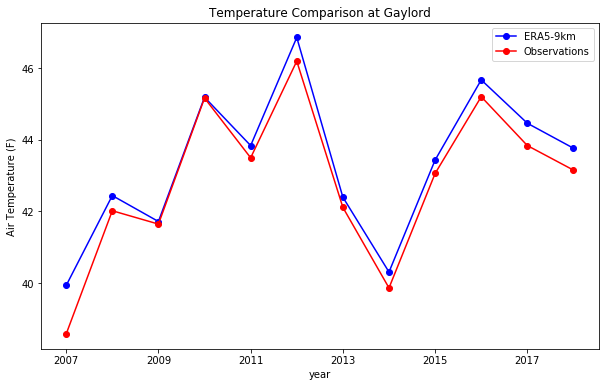

In [6]:
plt.figure(figsize=(10,6))
obs_temp_year = df1.groupby(df1.YEAR)['atmp'].mean()
era_temp_year = df2.groupby(df2.YEAR)['atmp'].mean()
plt.plot(list(range(2007,2019)), era_temp_year, 'b-o')
plt.plot(list(range(2007,2019)), obs_temp_year, 'r-o')
plt.xticks([2007,2009,2011,2013,2015,2017])
plt.xlabel('year')
plt.ylabel('Air Temperature (F)')
plt.legend(['ERA5-9km', 'Observations'])
plt.title('Temperature Comparison at Gaylord')
plt.savefig('./plot/Gaylord/ERA5-9km-temp.png')

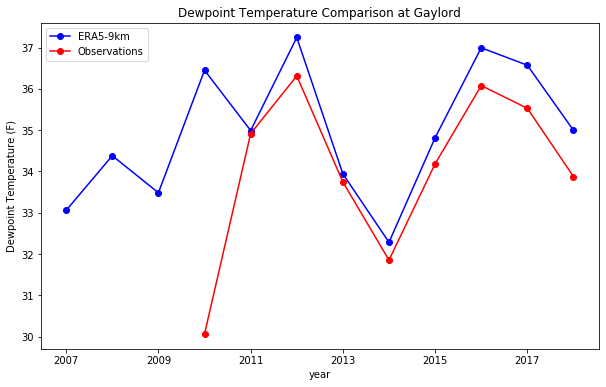

In [7]:
plt.figure(figsize=(10,6))
obs_temp_year = df1.groupby(df1.YEAR)['dew'].mean()
era_temp_year = df2.groupby(df2.YEAR)['dew'].mean()
plt.plot(list(range(2007,2019)), era_temp_year, 'b-o')
plt.plot(list(range(2007,2019)), obs_temp_year, 'r-o')
plt.xticks([2007,2009,2011,2013,2015,2017])
plt.xlabel('year')
plt.ylabel('Dewpoint Temperature (F)')
plt.legend(['ERA5-9km', 'Observations'])
plt.title('Dewpoint Temperature Comparison at Gaylord')
plt.savefig('./plot/Gaylord/ERA5-9km-dew.png')

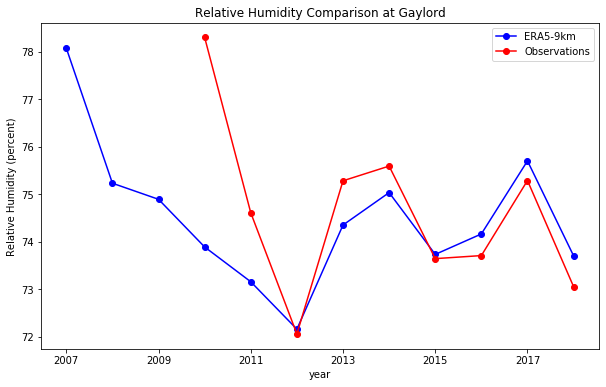

In [8]:
plt.figure(figsize=(10,6))
obs_temp_year = df1.groupby(df1.YEAR)['relh'].mean()
era_temp_year = df2.groupby(df2.YEAR)['relh'].mean()
plt.plot(list(range(2007,2019)), era_temp_year, 'b-o')
plt.plot(list(range(2007,2019)), obs_temp_year, 'r-o')
plt.xticks([2007,2009,2011,2013,2015,2017])
plt.xlabel('year')
plt.ylabel('Relative Humidity (percent)')
plt.legend(['ERA5-9km', 'Observations'])
plt.title('Relative Humidity Comparison at Gaylord')
plt.savefig('./plot/Gaylord/ERA5-9km-rh.png')

In [9]:
eastern = pytz.timezone('US/Eastern')
dff = pd.date_range(start='9/19/2007', end='1/2/2019', freq='D')[1:-1].tz_localize(pytz.utc).tz_convert(eastern)
year = dff.strftime('%Y')
mon = dff.strftime('%-m')
day = dff.strftime('%-d')
obs_prcp_days = np.where(np.array(df1.groupby([df1.YEAR,df1.MONTH,df1.DAY])['pcpn'].sum())>0.01,1,0)
dff1 = pd.DataFrame({'YEAR':year, 'MONTH':mon, 'DAY':day,'events': obs_prcp_days})
dff1.astype(float)
obs_frq = dff1.groupby(dff1.YEAR)['events'].sum()
era_prcp_days = np.where(np.array(df2.groupby([df2.YEAR,df2.MONTH,df2.DAY])['pcpn'].sum())>0.01,1,0)
dff2 = pd.DataFrame({'YEAR':year, 'MONTH':mon, 'DAY':day,'events': era_prcp_days})
dff2.astype(float)
era_frq = dff2.groupby(dff2.YEAR)['events'].sum()

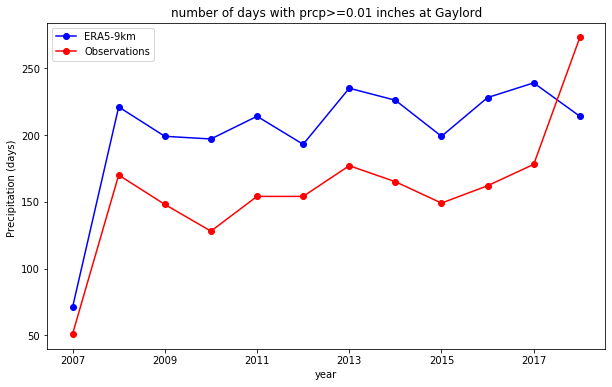

In [10]:
plt.figure(figsize=(10,6))
plt.plot(list(range(2007,2019)), era_frq, 'b-o')
plt.plot(list(range(2007,2019)), obs_frq, 'r-o')
plt.xticks([2007,2009,2011,2013,2015,2017])
plt.xlabel('year')
plt.ylabel('Precipitation (days) ')
plt.legend(['ERA5-9km', 'Observations'])
plt.title('number of days with prcp>=0.01 inches at Gaylord')
plt.savefig('./plot/Gaylord/ERA5-9km-prcp_events.png')

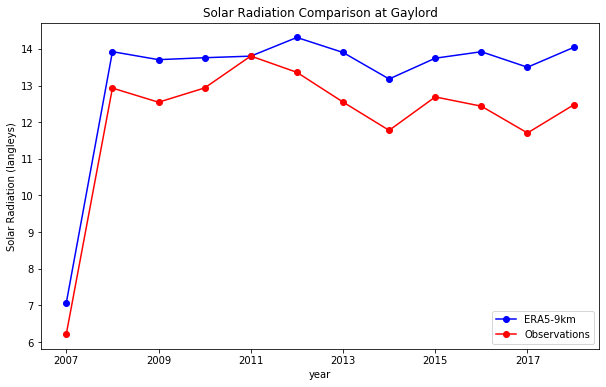

In [11]:
plt.figure(figsize=(10,6))
df1.srad = df1.srad * 0.085985
df1.srad = np.where(df1.srad < 0, 0, df1.srad)

obs_srad_year = df1.groupby(df1.YEAR)['srad'].mean()
era_srad_year = df2.groupby(df2.YEAR)['srad'].mean()
plt.plot(list(range(2007,2019)), era_srad_year, 'b-o')
plt.plot(list(range(2007,2019)), obs_srad_year, 'r-o')
plt.xticks([2007,2009,2011,2013,2015,2017])
plt.xlabel('year')
plt.ylabel('Solar Radiation (langleys)')
plt.legend(['ERA5-9km', 'Observations'])
plt.title('Solar Radiation Comparison at Gaylord')
plt.savefig('./plot/Gaylord/ERA5-9km-srad.png')

<Figure size 720x432 with 0 Axes>

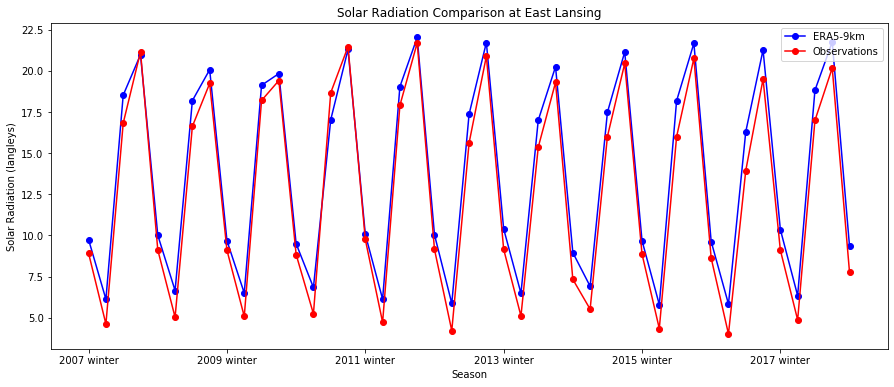

In [12]:
plt.figure(figsize=(10,6))
obs_solar_season = np.array(df1.groupby([df1.YEAR,df1.MONTH])['srad'].mean())[:-1].reshape(-1,3).mean(axis=1)
era_solar_season = np.array(df2.groupby([df2.YEAR,df2.MONTH])['srad'].mean())[:-1].reshape(-1,3).mean(axis=1)

plt.figure(figsize=(15,6))
plt.plot(list(range(1,46)), era_solar_season, 'b-o')
plt.plot(list(range(1,46)), obs_solar_season, 'r-o')
plt.xticks(np.arange(1, 46, step=8),['{0} winter'.format(2*i+2007) for i in range(11)])
plt.xlabel('Season')
plt.ylabel('Solar Radiation (langleys)')
plt.legend(['ERA5-9km', 'Observations'])
plt.title('Solar Radiation Comparison at East Lansing')
plt.savefig('./plot/Gaylord/ERA5-9km-solar_season.png')